In [151]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Configuration
import os
from config import Config
import pandas as pd
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('../kistec/custom.cfg', 'r') as f:
    cfg = Config(f)

In [153]:
# Input
query = '교량+사고'
topic_id_list = [0, 1]
_from = '201510'
_to = '201512'

In [155]:
# Data Import
def time_in_range(_from, _to, when):
    date_from = datetime.strftime(datetime.strptime(_from, '%Y%m'), '%Y%m')
    date_to = datetime.strftime(datetime.strptime(_to, '%Y%m'), '%Y%m')
    when = datetime.strftime(datetime.strptime(str(when), '%Y%m%d'), '%Y%m%d')
    
    if date_from >= date_to:
        return 'Error: _to must be larger than _from'
    else:
        return date_from <= when <= date_to

fname = '{}.xlsx'.format(query)
fpath = os.path.join(cfg.root, cfg.fdir_topic_assignment_news, fname)
data = pd.read_excel(fpath)
docs = data.loc[data['topic_id'].isin(topic_id_list)]

docs_target = docs.loc[[time_in_range(_from, _to, doc['date']) for _, doc in docs.iterrows()]]

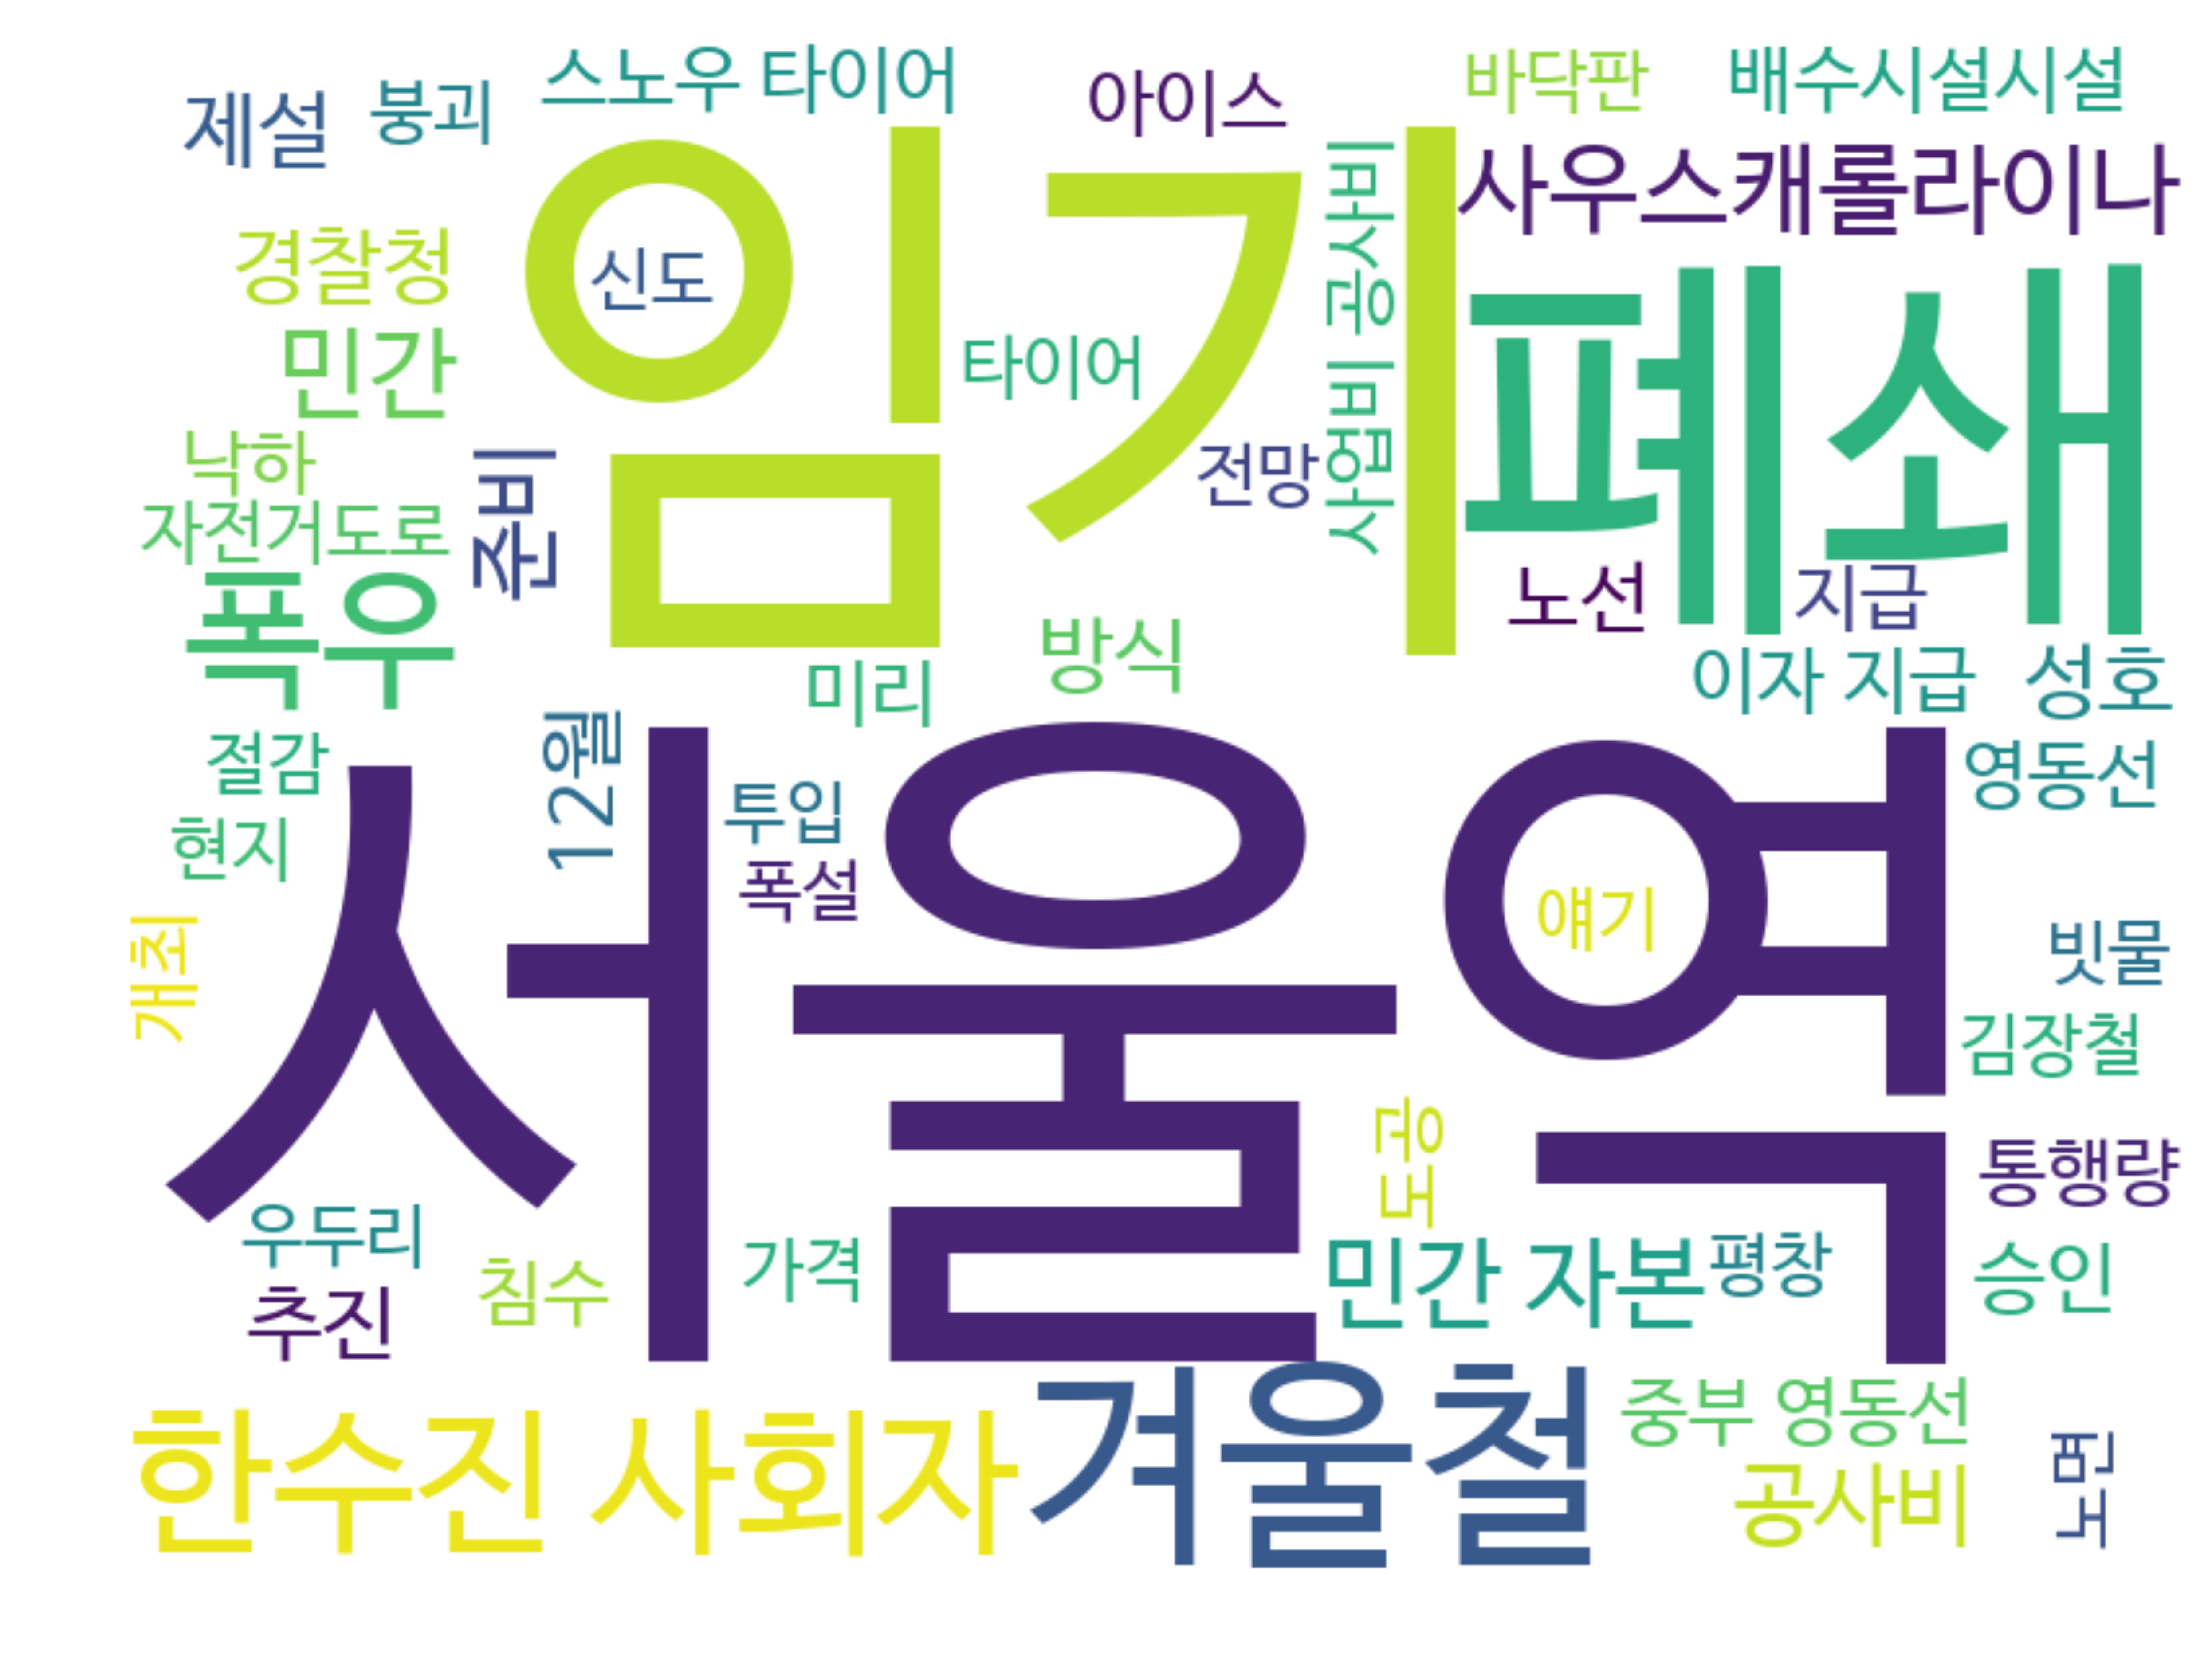

In [161]:
# Word Cloud
text = [doc['content_prep'] for _, doc in docs_target.iterrows()]
wc = WordCloud(
    font_path=cfg.font_path,
    background_color='white',
    width=800,
    height=600,
    max_words=50)
wc = wc.generate_from_text('  '.join(text))

fig = plt.figure(figsize=(10,8), dpi=600)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()